# Linear Regression on Age & Sign Legibility in Python
## Third Portfolio Project by George Simpson


This project is a simple statisitcal example designed to practice performing linear regression in Python. 

Simple linear regression is a method from advanced statistics that is used to study the relationship between two variables that are continuous. In this example, I will be using an excel file with two invented columns of data that give information on the age of a driver, & the distance of sign legibility (in feet). The columns will be shortened to 'Age' & 'Distance' respectively. 

#### Section 1: Data Import & Exploratory Analysis

First we will import the packages 'pandas', 'numpy', 'matplotlib', & some useful 'sklearn' modules to help with splitting the data & performing linear regression. 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

With the needed packages imported, we can now import the excel file, which is in a file on my personal desktop.

In [37]:
excel_file = './Desktop/Portfolio Data/student_scores.xls'
dataset = pd.read_excel(excel_file)

With the file now imported, let's look at the shape of the dataset.

In [38]:
dataset.shape

(23, 2)

This tells us that we have 25 rows & 2 columns. This is a small dataset making it easy to deal with. It also removes the need for tools from big data. Let's have a look at the first 5 rows of the dataset using the 'head()' method.

In [39]:
dataset.head()

,Age,Distance
0,61,401
1,23,510
2,56,418
3,39,462
4,42,477


Before we proceed any further, let's check some underlying details of the dataset with the 'info()' method.

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
Age         23 non-null int64
Distance    23 non-null int64
dtypes: int64(2)
memory usage: 448.0 bytes


Here we can see that we have a pandas dataframe with 23 entries. We also have two columns (both of integer type), & all 23 entries are non-null which is great. For good measure, let's also have a look at some summary statistics using the 'describe' method.

In [41]:
dataset.describe()

,Age,Distance
count,23.000000,23.000000
mean,48.521739,443.956522
std,21.436735,73.382236
min,17.000000,310.000000
25%,30.000000,406.500000
50%,48.000000,437.000000
75%,63.500000,487.500000
max,82.000000,593.000000


With this information in place, let's now draw a scatter plot of the data. We will plot the age of the driver on the x-axis, & the distance the driver can see on the y-axis. We will use 'ggplot' style here.    

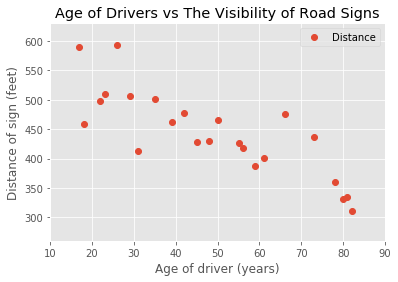

In [42]:
dataset.plot(x='Age', y='Distance', style='o')
plt.style.use('ggplot')
plt.ylim([260, 630])
plt.xlim([10, 90])
plt.title('Age of Drivers vs The Visibility of Road Signs')
plt.xlabel('Age of driver (years)')
plt.ylabel('Distance of sign (feet)')
plt.show()

The plot works! Here, we can see that there exists a negative correlation between age & distance. With our exploratory data analysis complete, we will move onto the next section, where we will start our machine learning prediction. 

#### Section 2: Training the Algorithm

First we need to split our data into the test & training set to perform a ML algorithm. Note that the dependent variables are to be predicted. We want to predict the distance a person can see based on their age. For this reason, 'X' (the independent variable) will be the age of the drvier, & 'y' (the dependent variable) will be the distance the driver can read the sign. This can be done with index slicing since we only have two columns. 

In [43]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

The next step is to split the data into the training & test sets. We can do this using the 'train_test_split' method imported from scikit-learn. Note that the training set is a subset to train the model, & the test set is a subset to test the trained model (the test set will be smaller than the training set). 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In general, the test set must be large enough to yield meaningful results, & it must be representative of the data set as a whole (which is the case here). Here,  we split 80% of the data as the training set, & 20% to be the test set. Also we set zero to be the random seed. With the split in place, now we can train our algorithm calling the 'fit()' method on our algorithm.

In [45]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In linear regression, the model has an intercept & a slope. To find the intercept (the y-coefficient), we perform the following command.

In [46]:
print(regressor.intercept_)

577.794806356


To see what the slope is (x-coefficient), we type the following command. 

In [47]:
print(regressor.coef_)

[-2.66203824]


We can interpret the slope by saying that for every year a person ages, their ability to see signs at a long distance (based on this data) decreases by approximately 2.6%.

#### Section 3: Making Predictions

The training of our algorithm is complete. Now we will move onto making predictions, by using the test set to see how well our algorithm predicts the percentage change in distance. Let's start by creating a numpy array containing the predicted values. 

In [48]:
y_pred = regressor.predict(X_test)

With this in place, we can now compare the actual output values of 'X_test' with the predicted values as follows.

In [49]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,387,420.734550
1,426,431.382703
2,360,370.155824
3,428,458.003086
4,334,362.169709


The model is not that precise, but it is close enough for now. Finally, we can evaluate our algorithm by calculating the mean absolute error (MAE), mean squared error (MSE),  & the root mean squared error (RMSE). We do this with the following commands.  

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 21.4891743807
Mean Squared Error: 592.770357186
Root Mean Squared Error: 24.3468757171


Here, the RMSE is 21.49 to two decimal places. This is less than 5% of the mean distance 443.96 ft implying that our algorithm is pretty good. This completes the simple linear regression. 